# Comparing by critical lifetime ratio (PHASOR part)
Simulating the lifetime decay from 3.07 to 2.5, for 20 points. Amplitude the same as before. Derive the index of separability to obtain critical
lifetime ratio.

In [1]:
from TCSPC import *
import matplotlib as mpl

In [4]:
EGFP = Phasor([0.497,0.503],[2.43,3.07])

In [2]:
def phasor_eq_func_A_vary(A_tau_arr,phasor):
    '''Function to be passed to phasor_solve_num to solve for A_tau array (A1,A2, tau1, tau2)
       Input: 
       A_tau_arr    parameter array A1,A2 tau1, tau2
       phasor       phasor array from Simulation().phasor to be resolved '''
    n = int(len(A_tau_arr)/2) #number of components
    y  = sum([A_tau_arr[j] * np.exp(-EGFP.t / A_tau_arr[j+n]) for j in range(n)]) #pure multiexponential
    y = np.convolve(y,EGFP.ker,'full')[:EGFP.n_bins]/np.sum(EGFP.ker)
    w,phasor_test = EGFP.phasor_fft(y=y) 
    A_sum = 1-np.sum(A_tau_arr[:n]) #A1,...An sum to 1
    phasor_compare = phasor_test.real[0:2*n-1]-phasor.real[0:2*n-1] #solve for A_tau_arr such that it gives 0
    return [A_sum]+list(phasor_compare) #

def phasor_eq_func(A_tau_arr,phasor):
    '''Function to be passed to phasor_solve_num to solve for A_tau array (A1, tau1, tau2) (2n-1)
       Input: 
       A_tau_arr    parameter array A1 tau1, tau2
       phasor       phasor array from Simulation().phasor to be resolved '''
    n = int((len(A_tau_arr)+1)/2) #number of components
    #A_tau_arr = np.insert(A_tau_arr,n-1,1-np.sum(A_tau_arr[:n-1])) #insert An
    y  = sum([A_tau_arr[j] * np.exp(-EGFP.t / A_tau_arr[j+n-1]) for j in range(n-1)]) #pure multiexponential
    y  += (1-np.sum(A_tau_arr[:n-1]))*np.exp(-EGFP.t / A_tau_arr[-1]) #last component
    y = np.convolve(y,EGFP.ker,'full')[:EGFP.n_bins]/np.sum(EGFP.ker)
    w,phasor_test = EGFP.phasor_fft(y=y) 
    phasor_compare = phasor_test.real[0:2*n-1]-phasor.real[0:2*n-1] #solve for A_tau_arr such that it gives 0
    return phasor_compare

def phasor_solve_num(phasor,x0):
    '''Solve for amplitude and lifetimes numerically using 3 phasors for 3 parameters (A1, tau1, tau2)
       phasor      phasor array (Simulation().phasor) to be resolved
       x0          initial guess for a_tau_arr'''
    return fsolve(phasor_eq_func,x0=x0,args = phasor)

In [7]:
tau_array = np.linspace(2.5,3.07,20)
par_arr_p = np.zeros((10,10,10,3)) #store parameters of 20 lifetime separation from phasor
par_arr_fit = np.zeros((10,20,10,3)) #store parameters of 20 lifetime separation from phasor
n_photon_arr
par_arr_p[0] = np.array(EGFP.generate_df()[['A1','tau1','tau2']])

In [ ]:
N_i = 15 # no. of # photon count point
N_j = 15 # no. of tau2 values
N_k = 10 # no. of repeated simulations
tau_array = np.linspace(2.5,3.07,N_i)
n_photon_array = np.logspace(4,8,N_j).astype(int)
par_arr_p = np.zeros((N_i,N_j,N_k,3))
par_arr_fit = np.zeros((N_i,N_j,N_k,3))
for i in range(N_i):
    EGFP.n_photon = n_photon_array[j]
    for j in range(N_j): #no background
        EGFP.tau[1] = tau_array[j]
        EGFP.repeat_sim(N_k)
        par_arr_p[i,j] = np.array(EGFP.generate_df()[['A1','tau1','tau2']])
        par_arr_fit[i,j] = np.array(EGFP.val_df(2)[['A1','tau1','tau2']])

In [29]:
mean_new

array([[[ 0.66350423,  2.19445475,  2.65588686],
        [-0.06566077,  2.17647703,  2.48338382],
        [ 0.47705096,  2.26792147,  2.69689068],
        [ 0.51290339,  2.35259264,  2.65997825],
        [ 0.4590376 ,  2.37424433,  2.68909704],
        [ 0.73145424,  2.34689882,  2.75218892],
        [ 0.48622121,  2.41411139,  2.72558648],
        [ 0.52372486,  2.34796325,  2.84678548],
        [ 0.51116163,  2.40137765,  2.80084367],
        [ 0.29329458,  2.29662907,  2.91268179],
        [ 0.51687636,  2.55200613,  2.82064753],
        [ 0.43132718,  2.40406758,  3.00403271],
        [ 0.58349932,  2.53451301,  2.87000368],
        [ 0.53012695,  2.45342835,  3.18156548],
        [ 0.50642944,  2.33040648,  3.12728437]],

       [[ 0.36751934,  2.42273864,  2.50266861],
        [ 0.54431305,  2.42878748,  2.54821737],
        [ 0.49699999,  2.43402533,  2.57783019],
        [ 0.49767752,  2.4343382 ,  2.61856841],
        [ 0.49689165,  2.42872308,  2.66384711],
        [ 0.496886

In [19]:
mean_p = np.mean(par_arr_p[8],axis = 1)
std_p = np.std(par_arr_p[8],axis = 1)

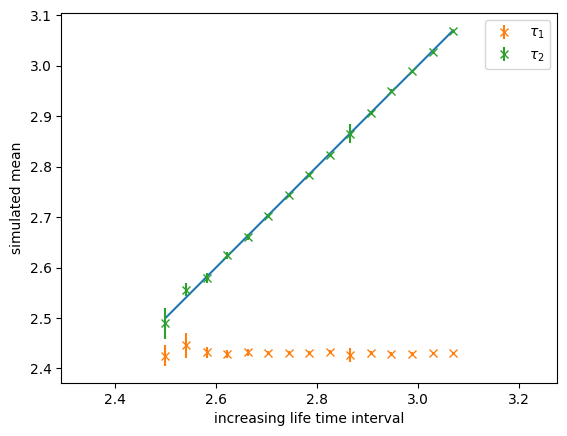

In [20]:
plt.figure()
plt.axis("equal")
plt.plot(tau_array,tau_array)
plt.errorbar(tau_array,mean_p[:,1],yerr=std_p[:,1],fmt = 'x',label=rf'$\tau_{1}$')
plt.errorbar(tau_array,mean_p[:,2],yerr=std_p[:,2],fmt = 'x',label=rf'$\tau_{2}$')

plt.xlabel("increasing life time interval")
plt.ylabel("simulated mean")
plt.legend()
plt.show()

## Separability

In [7]:
separability_kl = abs(mean_p[:,1]-mean_p[:,2]) / (np.sqrt(std_p[:,1])+np.sqrt(std_p[:,2]))**0.5
for i in separability_kl:
    if i < 1: 
        print("separability_kl is ", i, ", it's nonseparatable.")
    else:
        print("separability_kl is ", i)

separability_kl is  0.16809639397121828 , it's nonseparatable.
separability_kl is  0.1580638994101267 , it's nonseparatable.
separability_kl is  0.18484732335367618 , it's nonseparatable.
separability_kl is  0.2415088056278642 , it's nonseparatable.
separability_kl is  0.2504484633720923 , it's nonseparatable.
separability_kl is  0.37301216197494375 , it's nonseparatable.
separability_kl is  0.3576368754812594 , it's nonseparatable.
separability_kl is  0.48031104162932414 , it's nonseparatable.
separability_kl is  0.545966279557201 , it's nonseparatable.
separability_kl is  0.6046587258503969 , it's nonseparatable.
separability_kl is  0.7085605394247317 , it's nonseparatable.
separability_kl is  0.7363151294683669 , it's nonseparatable.
separability_kl is  0.787982399358584 , it's nonseparatable.
separability_kl is  0.8691107511125825 , it's nonseparatable.
separability_kl is  0.907276563188519 , it's nonseparatable.
separability_kl is  0.7820208183790338 , it's nonseparatable.
separab

## critical lifetime ratio

In [ ]:
N_i = 25 # no. of # photon count point
N_j = 20 # no. of tau2 values
N_k = 10 # no. of repeated simulations
n_photon_arr = np.logspace(4,8,N_i).astype(int)
tau_array    = np.linspace(2.5,3.07,N_j)
#result_array = np.zeros((N_i,N_j,N_k,3))
# result_fit_array = np.zeros((N_i,N_j,N_k,3))
# for i in range(N_i):
#     EGFP.n_photon = n_photon_arr[i]
#     for j in range(N_j): 
#         EGFP.tau = [2.43,tau_array[j]]
#         EGFP.repeat_sim(N_k)
#         for k in range(N_k): #no background
#             # phasor = EGFP.phasor_data[k]
#             # result_array[i,j,k] = phasor_solve_num(phasor,[EGFP.amp[0],*EGFP.tau])   
#             EGFP.fit(exp2,y = EGFP.sim_data[k],end = 100)
#             while True:
#                 par_arr = np.array([v.value for v in EGFP.par.values()]) #fit parameter array
#                 #refit for anamolous values
#                 if (par_arr[0] > 1) or (par_arr[1] > 10) or (par_arr[2] > 10):
#                     EGFP.multi_exp_data()
#                     EGFP.fit(exp2,y = EGFP.y2,end = 100)
#                 else:
#                     break
#             result_fit_array[i,j,k] = par_arr

In [23]:
#np.save('df/phasor_tau_separation_result_array',result_array)
#np.save('df/fit_tau_separation_result_array',result_fit_array)

In [24]:
result_array = np.load('df/phasor_tau_separation_result_array.npy')
result_fit_array = np.load('df/fit_tau_separation_result_array.npy')

In [23]:
mean_new = np.mean(par_arr_p,axis = 2)
std_new = np.std(par_arr_p,axis = 2)
mean_fit_new = np.mean(par_arr_fit,axis = 2)
std_fit_new = np.std(par_arr_fit,axis = 2)

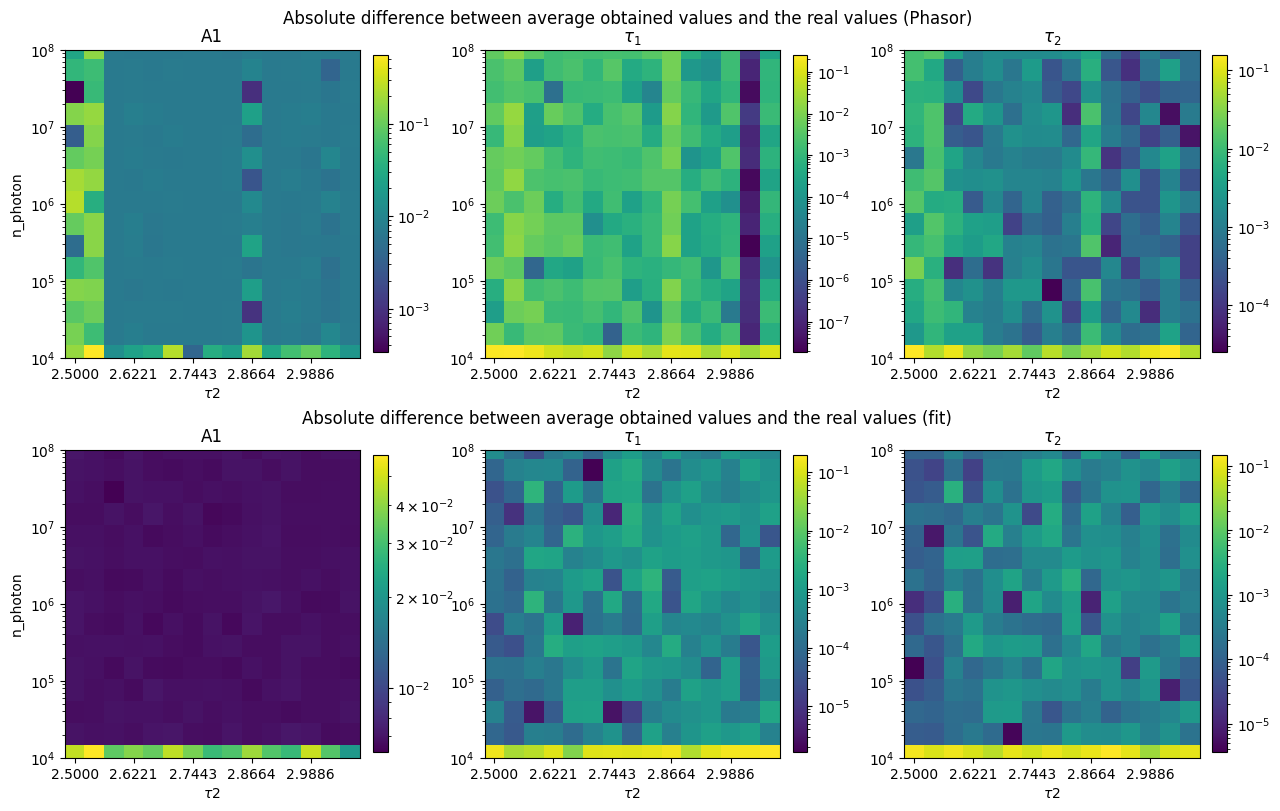

In [34]:
N,T2 = np.meshgrid(n_photon_array,tau_array,indexing = 'ij')
N,T1 = np.meshgrid(n_photon_array,np.ones(N_j)*2.43,indexing = 'ij')
N,A1 = np.meshgrid(n_photon_array,np.ones(N_j)*0.49,indexing = 'ij')
true = [A1,T1,T2]
fig = plt.figure(figsize=(15, 8))
big_axs = fig.subfigures(2, 1)

for j in range(2):
    big_axs[j].suptitle('Absolute difference between average obtained values and the real values'+[' (Phasor)',' (fit)'][j])
    big_axs[j]._fameon= False
    for i in range(3):
        axs = big_axs[j].add_subplot(1,3,i+1)
        Z = np.abs([mean_new,mean_fit_new][j][:,:,i]-true[i]) #absolute value 
        cax = axs.pcolormesh(T2,N,Z,norm=mpl.colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
        big_axs[j].colorbar(cax, ax=axs, fraction=0.046, pad=0.04)
        axs.set_yscale('log')
        axs.set_aspect('auto')
        axs.set_xticks(tau_array[::3])
        axs.set_xlabel(r'$\tau2$')
        if i ==0:
            axs.set_ylabel(f'n_photon')
        axs.set_title(['A1',r'$\tau_1$',r'$\tau_2$'][i])
        axs.set_ylim(1e4,1e8)
plt.subplots_adjust(wspace = 0.3)

In [50]:
fig.savefig('fig/tau_n_photon_phasor_fit.pdf')

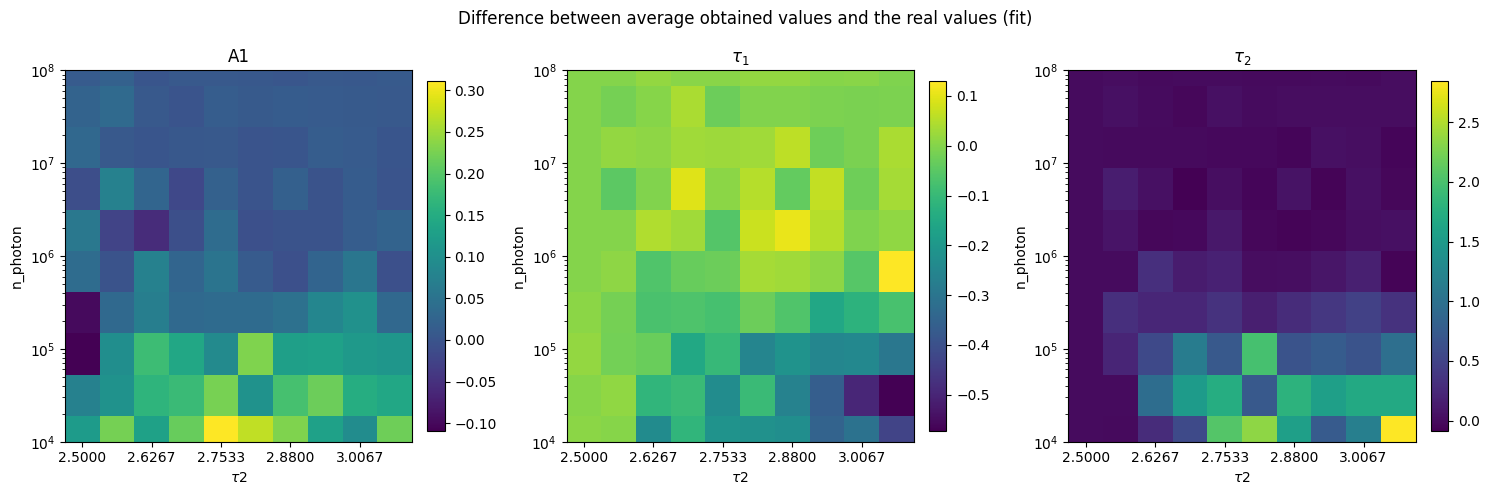

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Difference between average obtained values and the real values (fit)')
for i in range(3):
    delta_fit = mean_fit_new[:,:,i]-true[i]
    #delta_fit[np.abs(delta_fit)>2] = 2
    cax = axs[i].pcolormesh(T2,N,delta_fit)
    axs[i].set_title('First Image')
    fig.colorbar(cax, ax=axs[i], fraction=0.046, pad=0.04)
    axs[i].set_yscale('log')
    axs[i].set_aspect('auto')
    axs[i].set_xticks(tau_array[::2])
    axs[i].set_xlabel(r'$\tau2$')
    axs[i].set_ylabel(f'n_photon')
    axs[i].set_title(['A1',r'$\tau_1$',r'$\tau_2$'][i])
    axs[i].set_ylim(1e4,1e8)

plt.tight_layout()

In [67]:
delta_fit = mean_fit_new[:,:,i]-true[i]
delta_fit[np.abs(delta_fit)>1] 

array([9.73243038e+08, 2.08222262e+00, 2.85131146e+00, 2.69476667e+00,
       1.54150265e+00, 1.97309681e+00, 1.83806622e+00, 2.13794741e+00,
       1.20316467e+00, 1.09018404e+00, 1.50810289e+00])

In [33]:
fig.savefig('fig/tau2_n_photon_phasor.pdf')

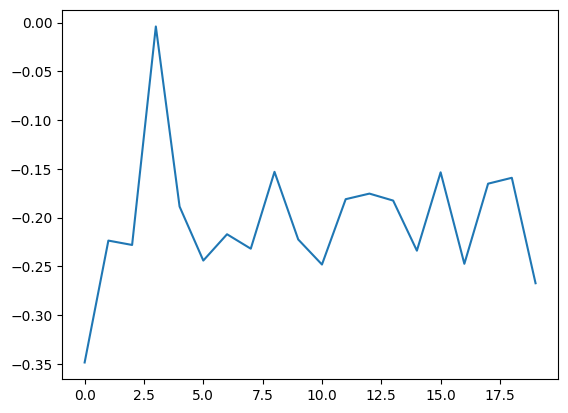

In [30]:
plt.plot(mean_new[4,:,1]-T2[4,:])